# Homework 1 Solution

## Problem 1

In [16]:
import pandas as pd

filename = " https :// raw . githubusercontent . com / tobiasdelpozo / data - analysis -2025/ refs / heads / master / homework / homework_1 / homework_1_data . csv ".replace(" ", "")
df = pd.read_csv(filename)


### Problem 1.1

In [17]:
x1 = df["X1"]
res = pd.Series({
    "mean": x1.mean(),
    "50%": x1.median(),
    "vars": x1.var(),
    "std": x1.std()
})
print(res.to_latex(
    float_format = "{:0.4f}".format, header=False, escape = True
))

\begin{tabular}{lr}
\toprule
\midrule
mean & 12.3435 \\
50\% & 11.9216 \\
vars & 38.8894 \\
std & 6.2361 \\
\bottomrule
\end{tabular}



### Problem 1.2

<Axes: title={'center': 'Histogram of X1'}, xlabel='X1', ylabel='Frequency'>

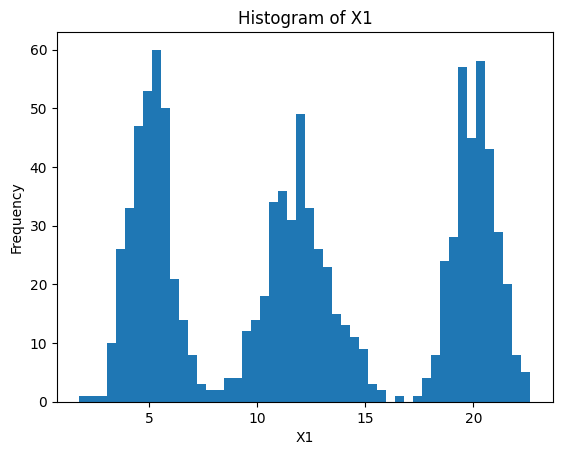

In [18]:
x1.plot.hist(bins = 50, xlabel = "X1", ylabel = "Frequency", title = "Histogram of X1")

### Problem 1.3

In [19]:
x1_categ = x1.to_frame().copy()
x1_categ["X1_categ"] = pd.cut(x1, bins=50, include_lowest=True)
x1_categ["X1_categ_mean"] = x1_categ.groupby("X1_categ")["X1"].transform("mean")

x1_categ.X1_categ_mean.value_counts().head(10)

/var/folders/0n/h3mbscl16zsdw5mc17k1hmk00000gn/T/ipykernel_65939/3420709266.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x1_categ["X1_categ_mean"] = x1_categ.groupby("X1_categ")["X1"].transform("mean")


X1_categ_mean
5.312237     60
20.303339    58
19.483157    57
4.895005     53
5.728142     50
12.000280    49
4.459820     47
19.923023    45
20.704234    43
11.178928    36
Name: count, dtype: int64

## Problem 2: kNN Regression

### Problem 2.1

<Axes: xlabel='X2', ylabel='target'>

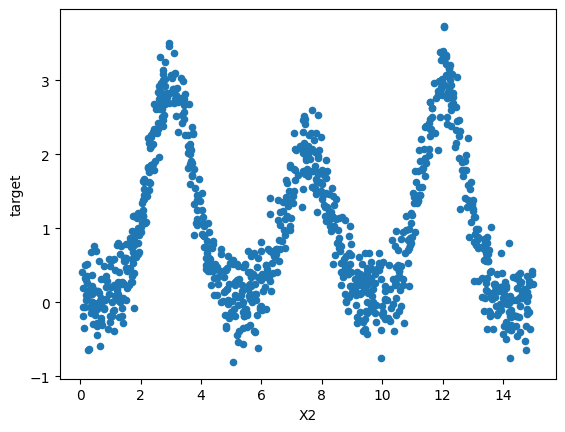

In [20]:
df.plot(x= "X2", y = "target", kind = "scatter")

### Problem 2.2

In [21]:
import numpy as np
from numpy.typing import NDArray

def knn_regressor(
    X_train: NDArray[np.float64],
    y_train: NDArray[np.float64],
    X_test: NDArray[np.float64],
    k: int
) -> NDArray[np.float64]:
    
    global distances
    y_pred = []
    for x_test in X_test:
        distances = np.linalg.norm(X_train - x_test, axis=1)
        knn_indices = np.argsort(distances)[:k]
        knn_values = y_train[knn_indices]
        y_pred.append(np.mean(knn_values))
    return np.array(y_pred)

# Use matrix operations for computational efficiency
def knn_regressor_matrix(
    X_train: NDArray[np.float64],
    y_train: NDArray[np.float64],
    X_test:  NDArray[np.float64],
    k: int
) -> NDArray[np.float64]:
    
    distances = np.linalg.norm(X_train[:, np.newaxis] - X_test[np.newaxis, :], axis=2)
    knn_indices = np.argsort(distances, axis=0)[:k, :]
    knn_values = y_train[knn_indices]
    y_pred = np.mean(knn_values, axis=0)
    return y_pred

### Problem 2.3

In [22]:
np.random.seed(42)

In [23]:
# Split the data into training and testing sets
ind = df.index.to_numpy()
np.random.shuffle(ind)
n = len(ind)
train_ind = ind[:int(n*0.8)]
test_ind = ind[int(n*0.8):]

X_train = df.loc[train_ind, ["X2"]].to_numpy()
X_test = df.loc[test_ind, ["X2"]].to_numpy()
y_train = df.loc[train_ind, "target"].to_numpy()
y_test = df.loc[test_ind, "target"].to_numpy()

All three methods returns same values: models are equivalent.

In [24]:
y_pred = knn_regressor(X_train, y_train, X_test, k=5)
y_pred_matrix = knn_regressor_matrix(X_train, y_train, X_test, k=5)

# Check the result using sklearn
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
y_pred_sklearn = model.fit(X_train, y_train).predict(X_test)
res['y_pred_sklearn'] = y_pred_sklearn

res = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'y_pred_matrix': y_pred_matrix,
    'y_pred_sklearn': y_pred_sklearn
})
res

,y_test,y_pred,y_pred_matrix,y_pred_sklearn
0,0.942309,1.183118,1.183118,1.183118
1,-0.304900,-0.077534,-0.077534,-0.077534
2,0.199063,0.179316,0.179316,0.179316
3,0.920019,0.876805,0.876805,0.876805
4,-0.025974,-0.021917,-0.021917,-0.021917
...,...,...,...,...
195,0.503604,0.312441,0.312441,0.312441
196,2.753759,2.935180,2.935180,2.935180
197,2.629064,2.500729,2.500729,2.500729
198,0.704771,0.321924,0.321924,0.321924


In [25]:
mse_knn = ((y_test - y_pred)**2).mean()
mse_knn

0.09961520156559153

### Problem 2.4

minimum MSE: 0.09259429638601414 at k=20


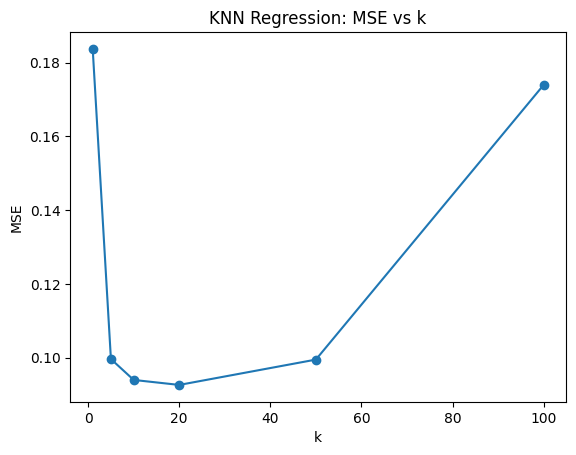

In [26]:
k_list = [1,5,10,20,50,100]
mse_list = []
for k in k_list:
    y_pred = knn_regressor(X_train, y_train, X_test, k=k)
    mse = ((y_test - y_pred)**2).mean()
    mse_list.append(mse)
mse_df = pd.Series(mse_list, index=k_list)
mse_df.plot(marker='o', xlabel='k', ylabel='MSE', title='KNN Regression: MSE vs k')
print(f"minimum MSE: {mse_df.min()} at k={mse_df.idxmin()}")

## Problem 3: Linear Regression

### Problem 3.1

In [27]:
import statsmodels.api as sm

X3 = df["X3"]
y = df["y"]
model = sm.OLS(y, X3).fit()
model.params

X3    0.564234
dtype: float64

### Problem 3.2

In [28]:
X3_const = sm.add_constant(X3)
model = sm.OLS(y, X3_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.67e-42
Time:                        15:36:09   Log-Likelihood:                -2280.4
No. Observations:                1000   AIC:                             4565.
Df Residuals:                     998   BIC:                             4575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1515      0.146     48.847      0.000       6.864       7.439
X3            -0.2926      0.020    -14.332      0.000      -0.333      -0.253
==============================================================================
Omnibus:                      146.607   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.650
Skew:                          -0.011   Prob(JB):                     1.81e-08
Kurtosis:                       2.075   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 3.3

In [29]:
y_demean = y - y.mean()
X3_demean = X3 - X3.mean()
model = sm.OLS(y_demean, X3_demean).fit()
model.params

X3   -0.292625
dtype: float64

### Problem 3.4

<Axes: xlabel='X3', ylabel='y'>

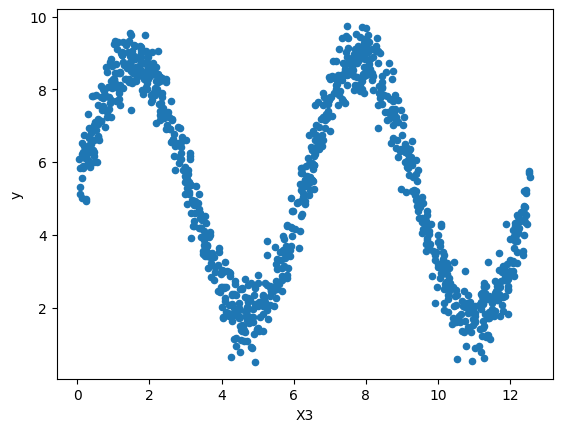

In [30]:
df.plot.scatter(x='X3', y='y')

### Problem 3.5

In [31]:
target = df["y"]
X3_sin = np.sin(df["X3"])
df["X3_sin"] = X3_sin
X3_sin_const = sm.add_constant(X3_sin)
model = sm.OLS(target, X3_sin_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.668e+04
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:36:09   Log-Likelihood:                -712.76
No. Observations:                1000   AIC:                             1430.
Df Residuals:                     998   BIC:                             1439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2484      0.016    335.697      0.000       5.218       5.279
X3             3.5362      0.022    163.327      0.000       3.494       3.579
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.185
Skew:                          -0.028   Prob(JB):                        0.912
Kurtosis:                       2.964   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 3.6

<Axes: xlabel='X3_sin', ylabel='y'>

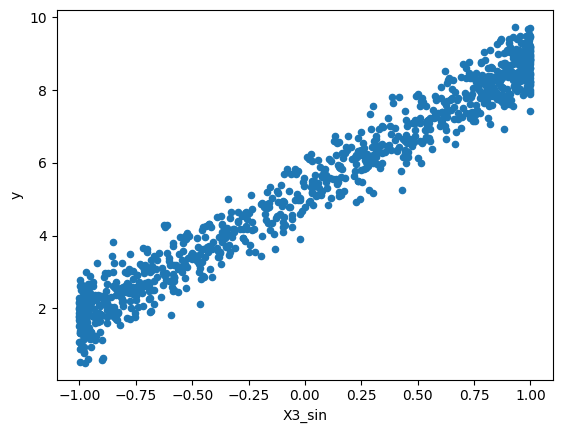

In [32]:
df.plot.scatter(x='X3_sin', y='y')